# Indonesia Covid-19 Cases by Provinces

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import folium as fo
from folium.plugins import FloatImage

<hr>

### 1. Sraping data from [Wikipedia](https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Indonesia)

In [5]:
# 1a. basic pandas read html table
data = pd.read_html('https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Indonesia')

In [6]:
data[3]

,Provinces,Confirmed[a],Recovered[a],Deaths[a],Active cases,Official website,Unnamed: 6
0,Aceh,4,0,0,4,covid19.acehprov.go.id,NaN
1,Bali,9,0,2,7,infocorona.baliprov.go.id,NaN
2,Bangka Belitung,0,0,0,0,NaN,NaN
3,Banten,84,1,4,79,infocorona.bantenprov.go.id,NaN
4,Bengkulu,0,0,0,0,NaN,NaN
5,Central Java,43,0,6,37,corona.jatengprov.go.id,NaN
6,Central Kalimantan,6,0,0,6,NaN,NaN
7,Central Sulawesi,1,0,0,1,NaN,NaN
8,East Java,66,8,4,54,infocovid19.jatimprov.go.id,NaN
9,East Kalimantan,11,0,0,11,covid19.kaltimprov.go.id,NaN


In [8]:
# 1b. pandas read html from https request
url = 'https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Indonesia'
x = requests.get(url)
datacorona = pd.read_html(x.text)

In [11]:
datacorona[3]

,Provinces,Confirmed[a],Recovered[a],Deaths[a],Active cases,Official website,Unnamed: 6
0,Aceh,4,0,0,4,covid19.acehprov.go.id,NaN
1,Bali,9,0,2,7,infocorona.baliprov.go.id,NaN
2,Bangka Belitung,0,0,0,0,NaN,NaN
3,Banten,84,1,4,79,infocorona.bantenprov.go.id,NaN
4,Bengkulu,0,0,0,0,NaN,NaN
5,Central Java,43,0,6,37,corona.jatengprov.go.id,NaN
6,Central Kalimantan,6,0,0,6,NaN,NaN
7,Central Sulawesi,1,0,0,1,NaN,NaN
8,East Java,66,8,4,54,infocovid19.jatimprov.go.id,NaN
9,East Kalimantan,11,0,0,11,covid19.kaltimprov.go.id,NaN


<hr>
    
### 2. Cleaning data

In [12]:
df = datacorona[3].copy()
df = df.iloc[:35, :5]
df.columns = ['Provinsi', 'Confirmed', 'Recovered', 'Deaths', 'Active cases']
df.iloc[12]['Provinsi'] = 'Jakarta'
df.iloc[17]['Confirmed'] = 2
df.iloc[28]['Confirmed'] = 4
df[['Confirmed', 'Recovered', 'Deaths', 'Active cases']] = df[['Confirmed', 'Recovered', 'Deaths', 'Active cases']].astype('int32')

In [13]:
df

,Provinsi,Confirmed,Recovered,Deaths,Active cases
0,Aceh,4,0,0,4
1,Bali,9,0,2,7
2,Bangka Belitung,0,0,0,0
3,Banten,84,1,4,79
4,Bengkulu,0,0,0,0
5,Central Java,43,0,6,37
6,Central Kalimantan,6,0,0,6
7,Central Sulawesi,1,0,0,1
8,East Java,66,8,4,54
9,East Kalimantan,11,0,0,11


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Provinsi      35 non-null     object
 1   Confirmed     35 non-null     int32 
 2   Recovered     35 non-null     int32 
 3   Deaths        35 non-null     int32 
 4   Active cases  35 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 764.0+ bytes


In [15]:
df.describe()

,Confirmed,Recovered,Deaths,Active cases
count,35.000000,35.000000,35.000000,35.000000
mean,29.942857,1.314286,2.485714,26.142857
std,101.681725,5.400280,8.846307,87.667199
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000
50%,4.000000,0.000000,0.000000,4.000000
75%,10.000000,0.000000,1.000000,9.000000
max,598.000000,31.000000,51.000000,516.000000


In [16]:
df[['Confirmed', 'Recovered', 'Deaths', 'Active cases']].sum()

Confirmed       1048
Recovered         46
Deaths            87
Active cases     915
dtype: int64

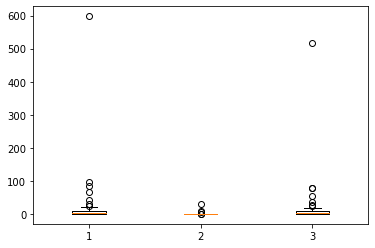

In [17]:
plt.boxplot([df['Confirmed'], df['Recovered'], df['Active cases']])
plt.show()

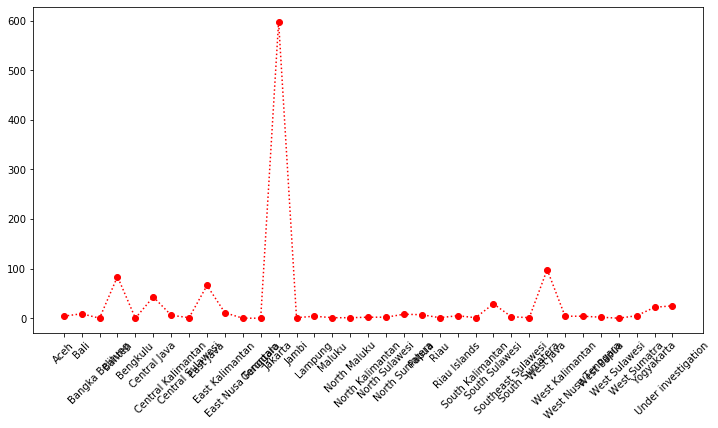

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df['Provinsi'], df['Confirmed'], 'r:o')
plt.xticks(rotation=45)
plt.show()

<hr>

### 3. Get provinces' position & logo from local file

In [23]:
prov = pd.read_json('./data/gps_indonesia.json')
prov

,Provinsi,latitude,longitude,logo
0,Aceh,4.695135,96.749399,https://upload.wikimedia.org/wikipedia/commons...
1,Bali,-8.409518,115.188916,https://4.bp.blogspot.com/-ELlrLdH0frM/WSz4Ajq...
2,Bangka Belitung,-2.741051,106.440587,https://upload.wikimedia.org/wikipedia/commons...
3,Banten,-6.405817,106.064018,https://upload.wikimedia.org/wikipedia/commons...
4,Bengkulu,-3.577847,102.346388,https://upload.wikimedia.org/wikipedia/commons...
5,Central Java,-7.150975,110.140259,https://upload.wikimedia.org/wikipedia/commons...
6,Central Kalimantan,-1.681488,113.382355,https://upload.wikimedia.org/wikipedia/commons...
7,Central Sulawesi,-1.430025,121.445618,http://1.bp.blogspot.com/-Mb3OPbim3Gw/VrYYo_59...
8,East Java,-7.536064,112.238402,https://2.bp.blogspot.com/-S1hrqQnm0nc/XDCpZ6C...
9,East Kalimantan,1.640630,116.419389,https://upload.wikimedia.org/wikipedia/commons...


<hr>

### 4. Merge 2 dataframes

In [24]:
dataku = pd.merge(df, prov, on='Provinsi')
dataku

,Provinsi,Confirmed,Recovered,Deaths,Active cases,latitude,longitude,logo
0,Aceh,4,0,0,4,4.695135,96.749399,https://upload.wikimedia.org/wikipedia/commons...
1,Bali,9,0,2,7,-8.409518,115.188916,https://4.bp.blogspot.com/-ELlrLdH0frM/WSz4Ajq...
2,Bangka Belitung,0,0,0,0,-2.741051,106.440587,https://upload.wikimedia.org/wikipedia/commons...
3,Banten,84,1,4,79,-6.405817,106.064018,https://upload.wikimedia.org/wikipedia/commons...
4,Bengkulu,0,0,0,0,-3.577847,102.346388,https://upload.wikimedia.org/wikipedia/commons...
5,Central Java,43,0,6,37,-7.150975,110.140259,https://upload.wikimedia.org/wikipedia/commons...
6,Central Kalimantan,6,0,0,6,-1.681488,113.382355,https://upload.wikimedia.org/wikipedia/commons...
7,Central Sulawesi,1,0,0,1,-1.430025,121.445618,http://1.bp.blogspot.com/-Mb3OPbim3Gw/VrYYo_59...
8,East Java,66,8,4,54,-7.536064,112.238402,https://2.bp.blogspot.com/-S1hrqQnm0nc/XDCpZ6C...
9,East Kalimantan,11,0,0,11,1.640630,116.419389,https://upload.wikimedia.org/wikipedia/commons...


<hr>

### 5. Create maps

In [25]:
# 1st attempt

# -3.2998306,117.9473043
peta = fo.Map(
    location = [-0.5273,118.6963],
    tiles = 'OpenStreetMap',
    zoom_start = 5
)

for i in range(34):
    fo.Marker(
        [dataku.iloc[i]['latitude'], dataku.iloc[i]['longitude']],
        popup = '<b>Confirmed:' + str(dataku.iloc[i]['Confirmed']) + '</b><br><b>Recovered:' + str(dataku.iloc[i]['Recovered']) + '</b><br><b>Deaths:' + str(dataku.iloc[i]['Deaths']) + '</b></p>',
        tooltip = dataku.iloc[i]['Provinsi'],
        icon = fo.Icon(color='red', prefix='fa', icon='plus-circle')
    ).add_to(peta)

# peta.add_child(fo.LatLngPopup())

peta.save('okcor.html')
peta

In [92]:
# final result

# -3.2998306,117.9473043
peta = fo.Map(
    location = [-0.5273,118.6963],
    tiles = 'OpenStreetMap',
    zoom_start = 5
)

for i in range(34):
    fo.Marker(
        [dataku.iloc[i]['latitude'], dataku.iloc[i]['longitude']],
        popup = f"<h4><b>{dataku.iloc[i]['Provinsi']}</b></h4><table><tr><th style='color:red'>Confirmed&nbsp;&nbsp;</th><th style='color:green'>Recovered&nbsp;&nbsp;</th><th style='color:black'>Deaths&nbsp;&nbsp;</th></tr><tr><td><center><b style='color:red'>{str(dataku.iloc[i]['Confirmed'])}</b></center></td><td><center><b style='color:green'>{str(dataku.iloc[i]['Recovered'])}</b></center></td><td><center><b>{str(dataku.iloc[i]['Deaths'])}</b></center></td></tr></table>",
        tooltip = dataku.iloc[i]['Provinsi'],
        icon = fo.features.CustomIcon(icon_image=dataku.iloc[i]['logo'] ,icon_size=35)
    ).add_to(peta)
    fo.Circle(
        location = [dataku.iloc[i]['latitude'], dataku.iloc[i]['longitude']],
        radius = int(int(dataku.iloc[i]['Confirmed']) * 100),
        color = 'red',
        fill = True,
        fill_color = 'red',
    ).add_to(peta)

# create legend
image_file = 'https://raw.githubusercontent.com/LintangWisesa/Blulpmukp_FinKKP/master/simplinnovation.png'
FloatImage(image_file, bottom=3, left=77).add_to(peta)

# add text
# fo.Marker(
#     location=[-0.5273,118.6963],
#     icon=fo.DivIcon(html=f"""<div style="font-family: courier new; color: blue">okokokoko</div>""")
# ).add_to(peta)

# fitur klik untuk dpt lat & lng
# peta.add_child(fo.LatLngPopup())

peta.save('index.html')
peta